# Exercise 

This notebook contains the exercise .

### Preliminaries

This is a jupyter notebook. It allows you to run python code in cells. Other cells can conatin markdown text, etc. I tried to make the exercise so that you can by with minimal python knowledge.

To access python packages, we need to load a selection of them.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean as co
import seawater as sw
import seaborn as sns
sns.set_context(context='paper', font_scale=1.5)

### Model Data

Now we can load some model data and plot them.
This is a section across the Weddell Sea continental slope from a global MITgcm simulation at **horizontal resolution of 1/3°**. 

In [4]:
mod = xr.open_dataset('model.nc')

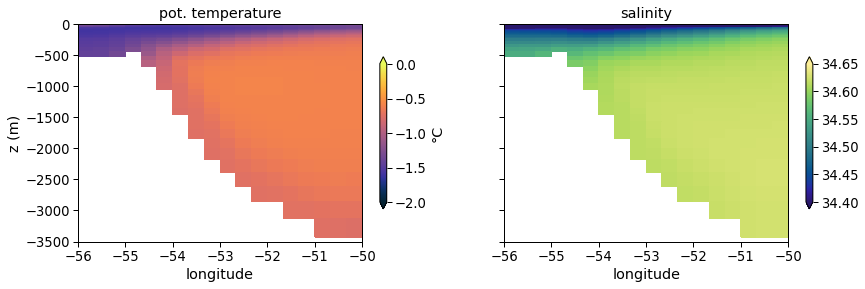

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[14,4], sharex='all', sharey='all')

c1 = axes[0].pcolormesh(mod.XC, mod.Z, mod.THETA, vmin=-2, vmax=.01, cmap=co.cm.thermal, shading='auto')
axes[0].set_xlim(-56,-50)
axes[0].set_ylim(-3500,0)
axes[0].set_xlabel('longitude')
axes[0].set_ylabel('z (m)')
axes[0].set_title('pot. temperature')

c2 = axes[1].pcolormesh(mod.XC, mod.Z, mod.SALT, vmin=34.4, vmax=34.65, cmap=co.cm.haline, shading='auto')
axes[1].set_xlim(-56,-50)
axes[1].set_ylim(-3500,0)
axes[1].set_xlabel('longitude')
axes[1].set_title('salinity')

plt.colorbar(c1, ax=axes[0], extend='both', shrink=.7, label=('°C'))
plt.colorbar(c2, ax=axes[1], extend='both', shrink=.7);


### Exercise 1: Model vs. Observations

1. What **qualitative differences** do you observe between the model and the observations?  
2. Where might these differences originate? Speculate on possible causes.

### Exercise 2: Rossby radius and resolution

The **first baroclinic Rossby radius** gives a characteristic eddy length scale and therefore an estimate of the horizontal resolution required to resolve mesoscale eddies.
Compute the first baroclinic Rossby radius for the given section. Based on the result, do you expect this model configuration to resolve eddies over the Antarctic continental slope?

Some hints:

The seawater library contains many useful functions. For example, the pressure can be computed as follows:

In [51]:
p = sw.pres(-mod.Z, -65)

### now bring it to the same shape as T and S
p = np.tile(p, [270, 1]).T

The bouyancy frequency can be computed with (typing a ? after a function and running the cell gives you further information on how the function works):

In [98]:
N2,_,_ = sw.bfrq()

TypeError: bfrq() missing 3 required positional arguments: 's', 't', and 'p'

More hints:
    
- The water depth can be found in mod.Depth
- a mean excluding nans can be done with np.nanmean(x, dimension)
- a line plot can be produced with plt.plot(x,y)

<ipython-input-93-d77599a9798f>:2: RuntimeWarning: Mean of empty slice
  N = np.nanmean(np.sqrt(N2),0)


(-56.0, -50.0)

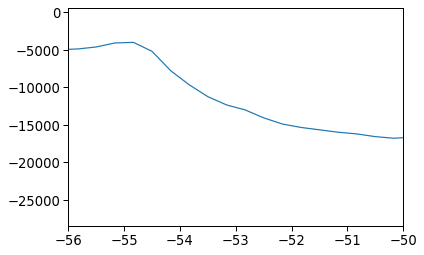

In [93]:
N2,_,_ = sw.bfrq(mod.SALT, mod.THETA, p, lat=65)
N = np.nanmean(np.sqrt(N2),0)
plt.plot(mod.XC, N*mod.Depth/np.pi/-1.3e-4)
plt.xlim(-56,-50)

### Exercise 3: Computational Cost

Tests on an HPC system suggest that running the global model at a grid spacing of 1/3° for one simulated year requires roughly **8.5 node hours**. Using your result from Exercise 2, **estimate the computational cost of running the model at eddy-resolving resolution for 100 years.**  
Finally, **compare the CO₂ emissions from a 100-year run at the two resolutions with the emissions from round-trip flight between London and New York.**

Hints (from the ARCHER2 HPC manual):

- Cost of 1 node hour = £0.20  
- CO₂ emissions of 1 node hour = 23 g